#Sebastián Latorre Diaz


Los modelos obtenidos han sido basados en las clases teoricas de Fundamentos para Machine Learning y utilizando ChatGpT para mejorar algunos aspectos en los graficos y poder visualizar de mejor manera los resultados.

#1A

1. a) Construya un modelo de ensamble basado en stacking, que consisten en una capa
de clasificadores debiles basada en bagging, que luego son combinados por un
clasificador fuerte (a diferencia de Random Forest, donde la combinacion se hace
por voto de mayorıa). Entrene este modelo en un conjunto de datos sintetico,
utilizando las funciones de scikit-learn vistas en clases.

In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.ensemble import BaggingClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Crear un conjunto de datos sintético usando make_blobs con mayor desviación estándar
X, y = make_blobs(n_samples=1000, centers=5, n_features=60, random_state=0, cluster_std=8)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

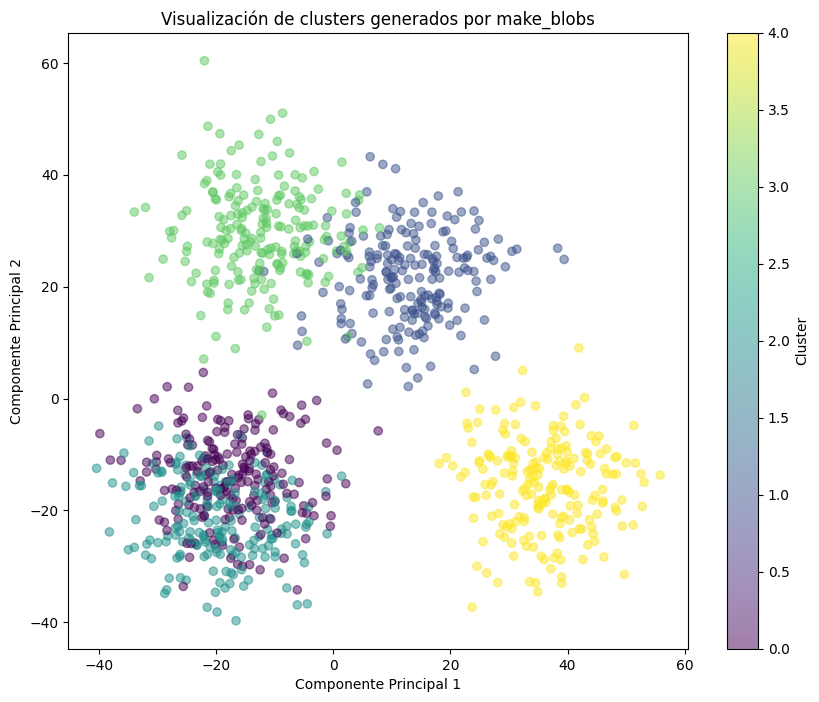

In [4]:
# Reducir la dimensionalidad a 2D para visualización
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Graficar los puntos
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.title('Visualización de clusters generados por make_blobs')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(scatter, label='Cluster')
plt.show()


In [5]:
# Definir clasificadores base utilizando Bagging
base_clf1 = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=0)
base_clf2 = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=5), n_estimators=10, random_state=0)

# Definir el clasificador fuerte con regularización
final_clf = LogisticRegression(C=0.01)

# Crear el modelo de Stacking
stacking_clf = StackingClassifier(
    estimators=[('bagging1', base_clf1), ('bagging2', base_clf2)],
    final_estimator=final_clf
)

# Entrenar el modelo
stacking_clf.fit(X_train, y_train)

# Evaluar el modelo
y_pred = stacking_clf.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.9166666666666666


#1B

1. b) Busque en Kaggle un set de datos de clasificacion de dificultad adecuada. Entrene
en el diversas combinaciones del esquema de stacking del item anterior, variando
los modelos de ambas capas. Mida el rendimiento de cada uno de estos modelos
en un conjunto de test independiente. (1,5 ptos.)


El dataset escogido es "predric liver disease"
https://www.kaggle.com/datasets/rabieelkharoua/predict-liver-disease-1700-records-dataset


Lo resultados obtenidos son:

Rendiemientos de 87.45% y 90,19% para el primer y segundo modelo respectivamente.

In [6]:
# Cargamos nuestro DataFrame en el notebook
!gdown 1NSfZOZ5xVyEaJe5tQuqaBxOi-0ZDawcX

# Nombramos nuestro dataframe df
df = pd.read_csv('Liver_disease_data.csv')
df

Downloading...
From: https://drive.google.com/uc?id=1NSfZOZ5xVyEaJe5tQuqaBxOi-0ZDawcX
To: /content/Liver_disease_data.csv
100% 150k/150k [00:00<00:00, 86.6MB/s]


,Age,Gender,BMI,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest,Diagnosis
0,58,0,35.857584,17.272828,0,1,0.658940,0,0,42.734240,1
1,71,1,30.732470,2.201266,0,1,1.670557,1,0,67.309822,1
2,48,0,19.971407,18.500944,0,0,9.928308,0,0,63.738956,0
3,34,1,16.615417,12.632870,0,0,5.630129,0,0,64.555873,1
4,62,1,16.065830,1.087815,0,1,3.566218,1,0,77.868689,1
...,...,...,...,...,...,...,...,...,...,...,...
1695,42,0,38.498295,14.384688,0,1,0.992289,0,0,97.933961,1
1696,40,0,27.600094,5.431009,0,0,8.390492,0,0,70.260528,1
1697,38,0,38.730017,6.324302,1,2,9.314222,0,1,56.053370,1
1698,67,0,35.820798,16.899417,0,2,3.224453,0,0,26.300875,1


In [7]:
# Preprocesar los datos
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [8]:
# Definir diferentes combinaciones de clasificadores base y final
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Definir combinaciones
combinations = [
    [('bagging1', BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=0)),
     ('bagging2', BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=5), n_estimators=10, random_state=0))],
    [('bagging1', BaggingClassifier(estimator=SVC(), n_estimators=10, random_state=0)),
     ('bagging2', BaggingClassifier(estimator=RandomForestClassifier(), n_estimators=10, random_state=0))]
]

# Evaluar cada combinación
for combo in combinations:
    stacking_clf = StackingClassifier(estimators=combo, final_estimator=LogisticRegression())
    stacking_clf.fit(X_train, y_train)
    y_pred = stacking_clf.predict(X_test)
    print(f'Combination: {combo}, Accuracy: {accuracy_score(y_test, y_pred)}')

Combination: [('bagging1', BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=0)), ('bagging2', BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=5), random_state=0))], Accuracy: 0.8745098039215686
Combination: [('bagging1', BaggingClassifier(estimator=SVC(), random_state=0)), ('bagging2', BaggingClassifier(estimator=RandomForestClassifier(), random_state=0))], Accuracy: 0.9019607843137255


#2
2. Muestre graficamente y justifique cual es la cantidad minima de vectores de soporte
que necesita un SVM lineal en un caso linealmente separable. Ayudese de los ejemplos
de codigo para responder. (1 pto.)

**Respuesta**

La cantidad minima de vectores de soporte es 2 por las siguientes razones:

1.   Un hiperplano en 2D es una línea recta. Para definir una línea recta en 2D, se necesitan exactamente dos puntos. Estos dos puntos determinan la orientación y posición de la línea.

2.   Los vectores de soporte son los puntos más cercanos al hiperplano de separación y están situados en el margen (es decir, las líneas paralelas al hiperplano que están a una distancia igual del hiperplano de separación).

3.   En el caso de un problema linealmente separable, el SVM busca maximizar el margen entre las dos clases. Los puntos en el margen son los vectores de soporte. Necesitamos al menos un vector de soporte de cada clase para definir este margen.

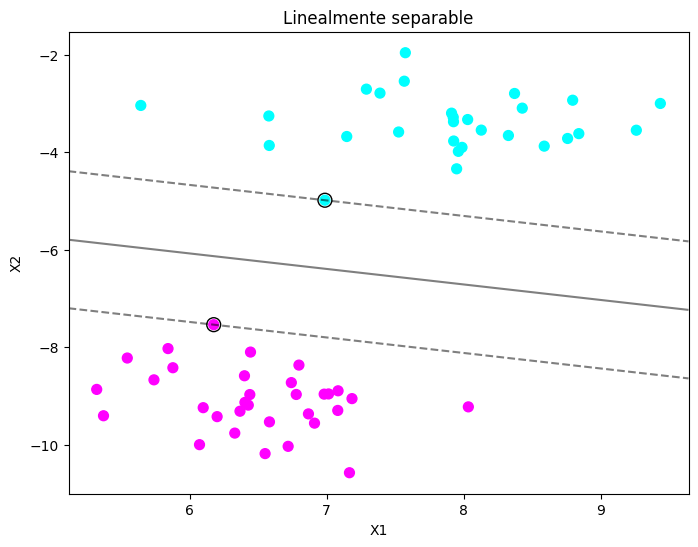

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
                   linewidth=1, facecolors='none', edgecolors='k')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

def plot_svm(X, y, N=10, kernel='linear'):
    X = X[:N]
    y = y[:N]
    model = SVC(kernel=kernel, C=1E10)
    model.fit(X, y)

    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='cool')
    plot_svc_decision_function(model)
    return model

# Crear un conjunto de datos sintético usando make_blobs
X, y = make_blobs(n_samples=200, centers=2, n_features=2, random_state=6, cluster_std=0.60)

# Graficar el caso linealmente separable
plt.figure(figsize=(8, 6))
model1 = plot_svm(X, y, N=60, kernel='linear')
plt.title('Linealmente separable')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


#3
3. Considere ahora un caso no linealmente separable y verifique si es posible realizar el
mismo analisis que en el item anterior, utilizando igualmente un SVM lineal. (1 pto.)

Utilizaremos make_circles para hacer un conjunto de datos no linealmente separable y luego aplicaremos el kernel linear para ver los resultados. Como se puede ver en el grafico no se obtienen buenos resultados ya que visualmente no esta separando las clases en dos grupos, aun asi podriamos ver el accuracy y saber que tan bajo es.

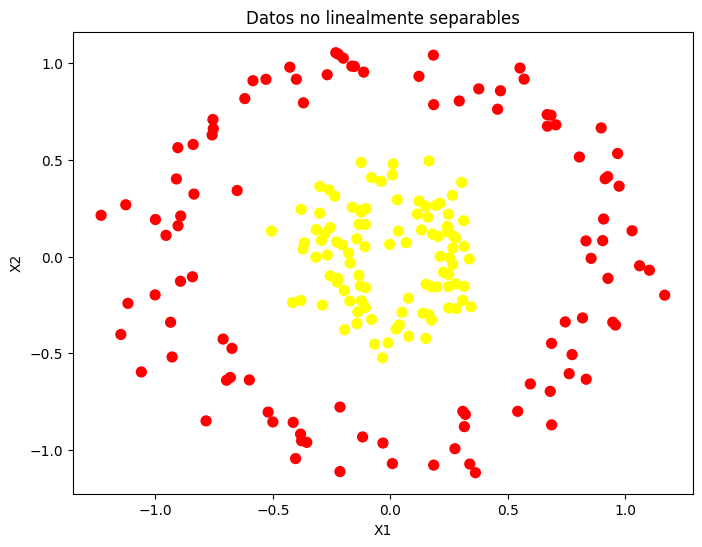

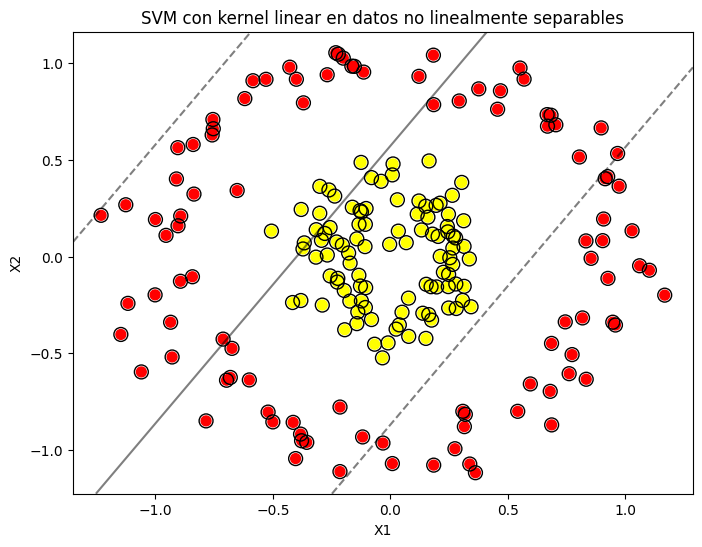

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.svm import SVC

# Crear un conjunto de datos no linealmente separable usando make_circles
X, y = make_circles(n_samples=200, factor=0.3, noise=0.1, random_state=0)

# Graficar los puntos
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.title('Datos no linealmente separables')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# Función para trazar la función de decisión SVM
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
                   linewidth=1, facecolors='none', edgecolors='k')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

# Entrenar el modelo SVM con kernel RBF
model = SVC(kernel='linear', C=1E6)
model.fit(X, y)

# Graficar los datos y la frontera de decisión del SVM
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)
plt.title('SVM con kernel linear en datos no linealmente separables')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


#4
4. Analice finalmente el mismo caso no linealmente separable del item anterior, pero ahora
entrenando SVMs con kernels distintos del lineal. Compare la cantidad de vectores de
soporte generados por estos SVM con los del lineal. ¿Cual es el kernel que requiere una
mayor proporcion de ejemplos como vectores de soporte? ¿Por que?

**Respuesta**


Resultados de los modelos son los siguiente y los graficos adjuntos despues del código:

Gráficos y Datos:
Cantidad de Vectores de Soporte por Kernel:
*   Linear: 135
*   Poly: 128
*   RBF: 11
*   Sigmoid: 69

Accuracy por Kernel:
*   Linear: 0.58
*   Poly: 0.57
*   RBF: 1.00
*   Sigmoid: 0.48


**¿Cuál es el kernel que requiere una mayor proporción de ejemplos como vectores de soporte? ¿Por qué?**

*   El kernel lineal requiere la mayor proporción de ejemplos como vectores de soporte. Tiene 135 vectores de soporte, lo que es mucho mayor que los otros kernels.

Razones:

*   Los datos no son linealmente separables, lo que hace que el SVM con kernel lineal necesite más vectores de soporte para intentar separar las clases de la mejor manera posible. Esto es visible en la gráfica donde el hiperplano no logra una separación clara y necesita muchos puntos en los márgenes.

*   Los kernels no lineales, como el RBF, tienen mayor capacidad para ajustarse a la complejidad de los datos no linealmente separables. El kernel RBF transforma los datos a un espacio de mayor dimensión donde es más fácil separarlos, requiriendo menos vectores de soporte para definir la frontera de decisión

*   Los kernels polinómicos y sigmoides, también son no lineales, pero no son tan efectivos como el RBF en este conjunto de datos específico, pero aún así manejan mejor la complejidad que el kernel lineal, requiriendo menos vectores de soporte

*   El kernel lineal puede estar tratando de sobreajustar los datos, tratando de acomodar los puntos lo mejor posible dentro de sus limitaciones, lo que incrementa la cantidad de vectores de soporte.

*   Finalmente se puede decir que el kernel lineal necesita más vectores de soporte porque no puede capturar la complejidad de los datos no linealmente separables, lo que da como resultado en una mayor cantidad de vectores de soporte y una menor precisión comparada con el kernel RBF

Kernel: linear, Accuracy: 0.58, Support Vectors: 135
Kernel: poly, Accuracy: 0.57, Support Vectors: 128
Kernel: rbf, Accuracy: 1.00, Support Vectors: 11
Kernel: sigmoid, Accuracy: 0.48, Support Vectors: 69


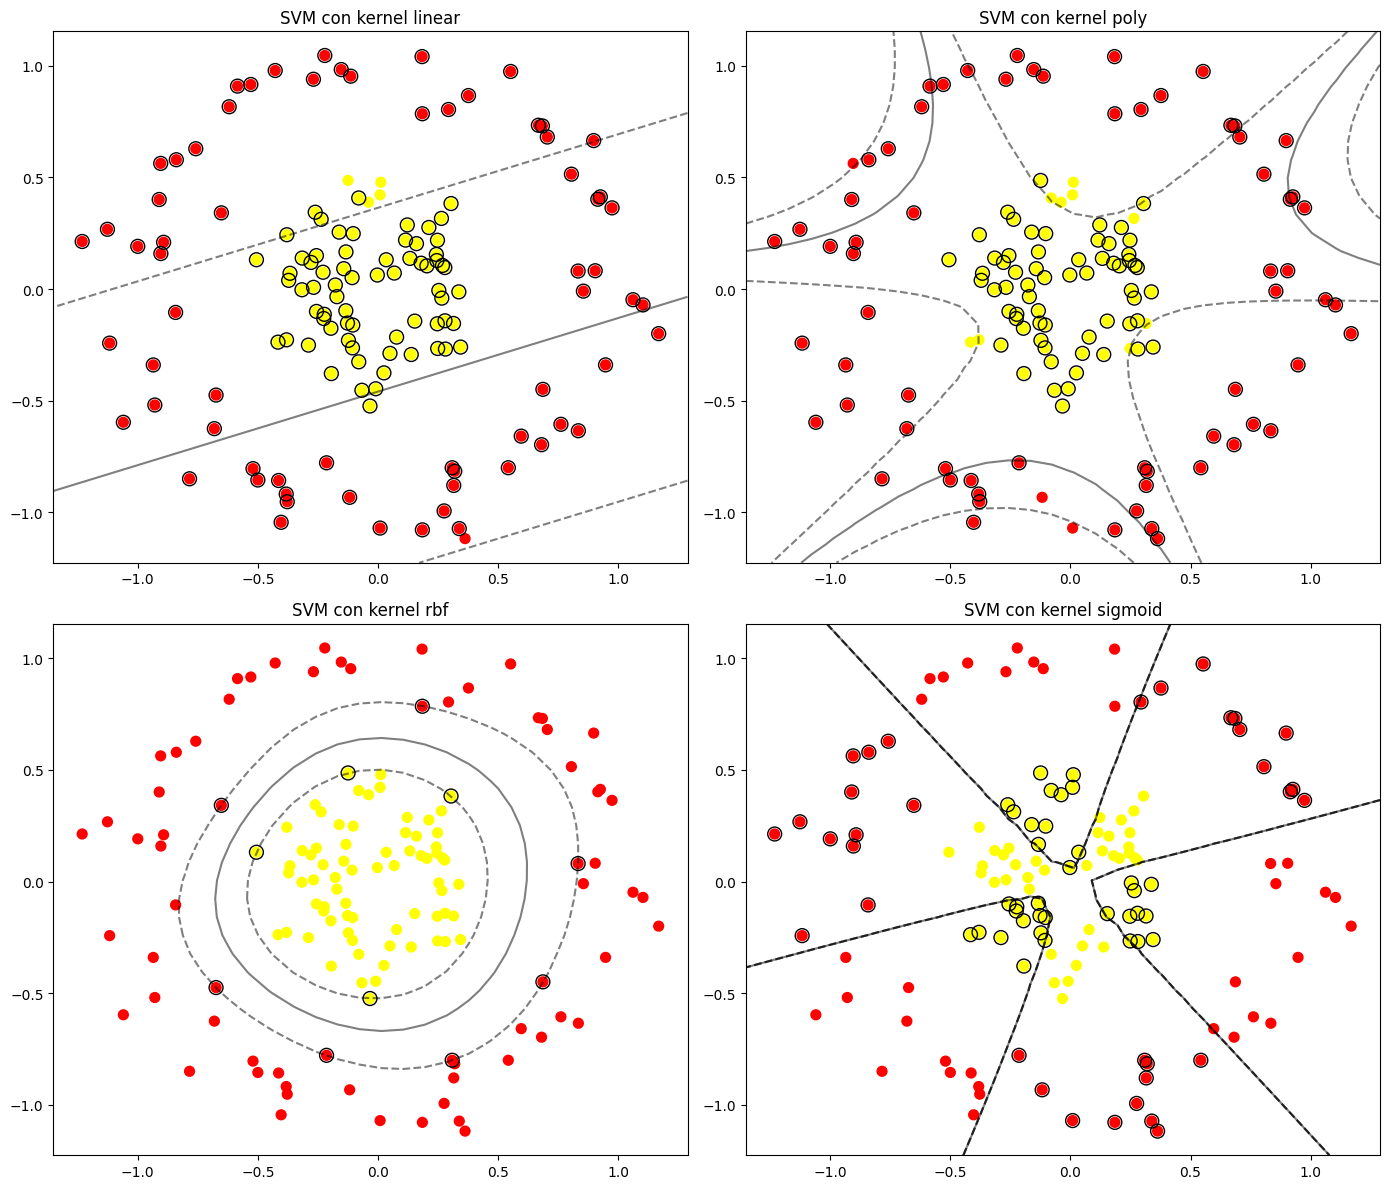

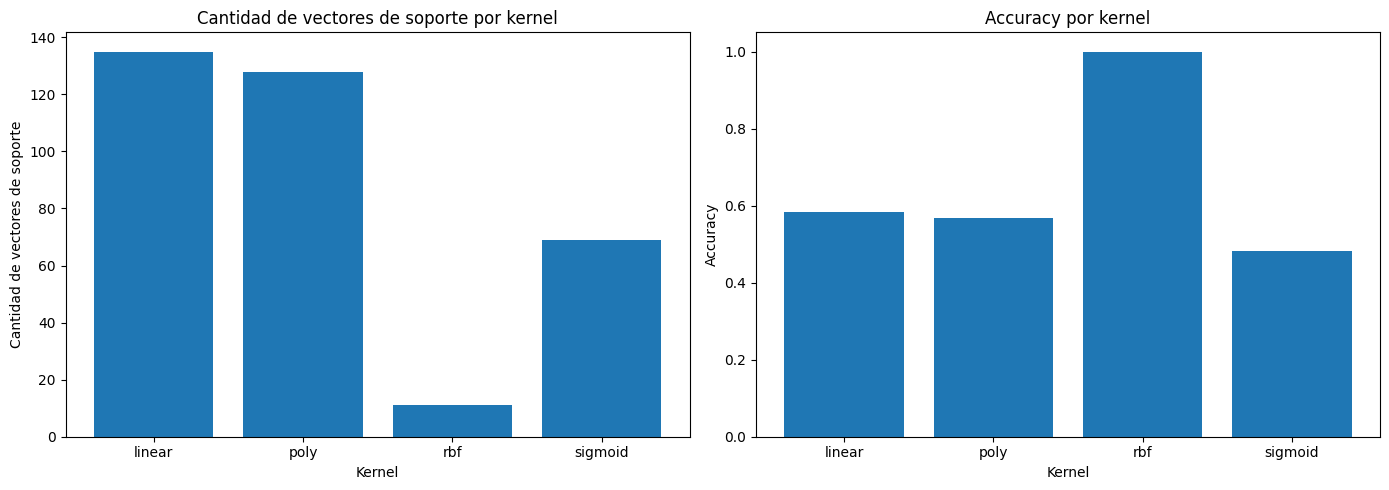

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Crear un conjunto de datos no linealmente separable usando make_circles
X, y = make_circles(n_samples=200, factor=0.3, noise=0.1, random_state=0)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Función para trazar la función de decisión SVM
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
                   linewidth=1, facecolors='none', edgecolors='k')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

# Definir los kernels a utilizar
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
models = {}
support_vectors_counts = {}
accuracies = {}

# Entrenar un modelo SVM para cada kernel y almacenar el número de vectores de soporte y la accuracy
for kernel in kernels:
    model = SVC(kernel=kernel, C=1E6)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    models[kernel] = model
    support_vectors_counts[kernel] = len(model.support_vectors_)
    accuracies[kernel] = accuracy_score(y_test, y_pred)
    print(f"Kernel: {kernel}, Accuracy: {accuracies[kernel]:.2f}, Support Vectors: {support_vectors_counts[kernel]}")

# Graficar los datos y las fronteras de decisión para cada kernel
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.ravel()

for ax, kernel in zip(axes, kernels):
    model = models[kernel]
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='autumn')
    plot_svc_decision_function(model, ax=ax)
    ax.set_title(f'SVM con kernel {kernel}')

plt.tight_layout()
plt.show()

# Crear una figura para ambos gráficos de barras
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Graficar la cantidad de vectores de soporte para cada kernel
ax1.bar(support_vectors_counts.keys(), support_vectors_counts.values())
ax1.set_title('Cantidad de vectores de soporte por kernel')
ax1.set_xlabel('Kernel')
ax1.set_ylabel('Cantidad de vectores de soporte')

# Graficar los accuracies para cada kernel
ax2.bar(accuracies.keys(), accuracies.values())
ax2.set_title('Accuracy por kernel')
ax2.set_xlabel('Kernel')
ax2.set_ylabel('Accuracy')

# Ajustar el layout para que no se superpongan los gráficos
plt.tight_layout()
plt.show()